### Movie Classification Dataset
- Classify Movies into Oscar Nominees or Not: https://www.kaggle.com/code/aryantyagi19/movie-classification-eda-modeling/input
- 18 features, output ~ Oscar Nominated or Not

### Import the libraries we'll need

In [1]:
# Import the libraries we'll use below.
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics

%matplotlib inline

### Import Movie Classification data

In [4]:
movie = pd.read_csv('../datasets/Movie_classification.csv', delimiter=',')

In [5]:
print(movie['Start_Tech_Oscar'].value_counts(normalize=True))
print('\n')
movie.head()

1    0.545455
0    0.454545
Name: Start_Tech_Oscar, dtype: float64




,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [7]:
print(list(movie.columns))

display(movie.describe().T)

['Marketing expense', 'Production expense', 'Multiplex coverage', 'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating', 'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views', '3D_available', 'Time_taken', 'Twitter_hastags', 'Genre', 'Avg_age_actors', 'Num_multiplex', 'Collection', 'Start_Tech_Oscar']


,count,mean,std,min,25%,50%,75%,max
Marketing expense,506.0,92.270471,172.030902,20.1264,21.64090,25.1302,93.54165,1799.524
Production expense,506.0,77.273557,13.720706,55.9200,65.38000,74.3800,91.20000,110.480
Multiplex coverage,506.0,0.445305,0.115878,0.1290,0.37600,0.4620,0.55100,0.615
Budget,506.0,34911.144022,3903.038232,19781.3550,32693.95250,34488.2175,36793.54250,48772.900
Movie_length,506.0,142.074901,28.148861,76.4000,118.52500,151.0000,167.57500,173.500
Lead_ Actor_Rating,506.0,8.014002,1.054266,3.8400,7.31625,8.3075,8.86500,9.435
Lead_Actress_rating,506.0,8.185613,1.054290,4.0350,7.50375,8.4950,9.03000,9.540
Director_rating,506.0,8.019664,1.059899,3.8400,7.29625,8.3125,8.88375,9.425
Producer_rating,506.0,8.190514,1.049601,4.0300,7.50750,8.4650,9.03000,9.635
Critic_rating,506.0,7.810870,0.659699,6.6000,7.20000,7.9600,8.26000,9.400


<AxesSubplot:>

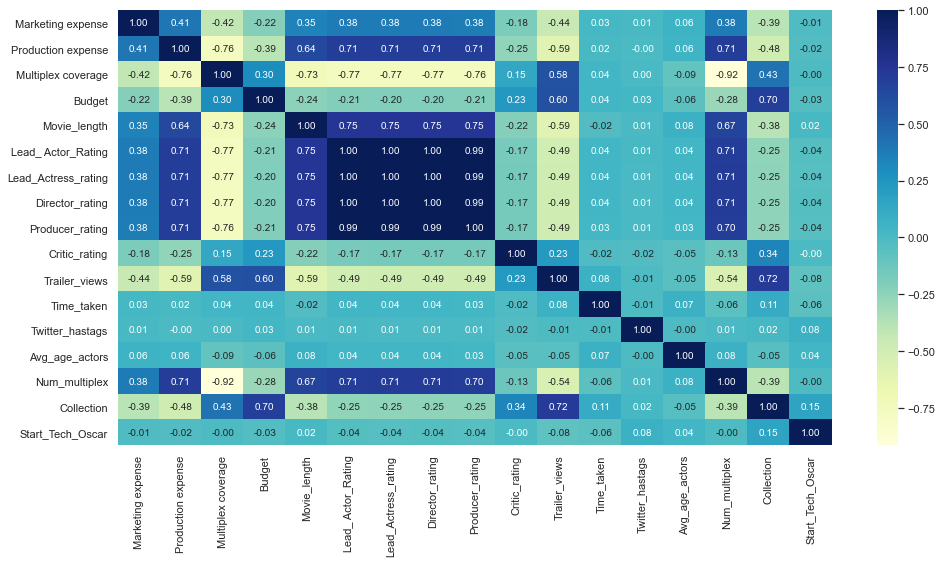

In [9]:
plt.figure(figsize= (16, 8))
sns.heatmap(movie.corr(), annot = True, cmap= 'YlGnBu', fmt= '.2f')

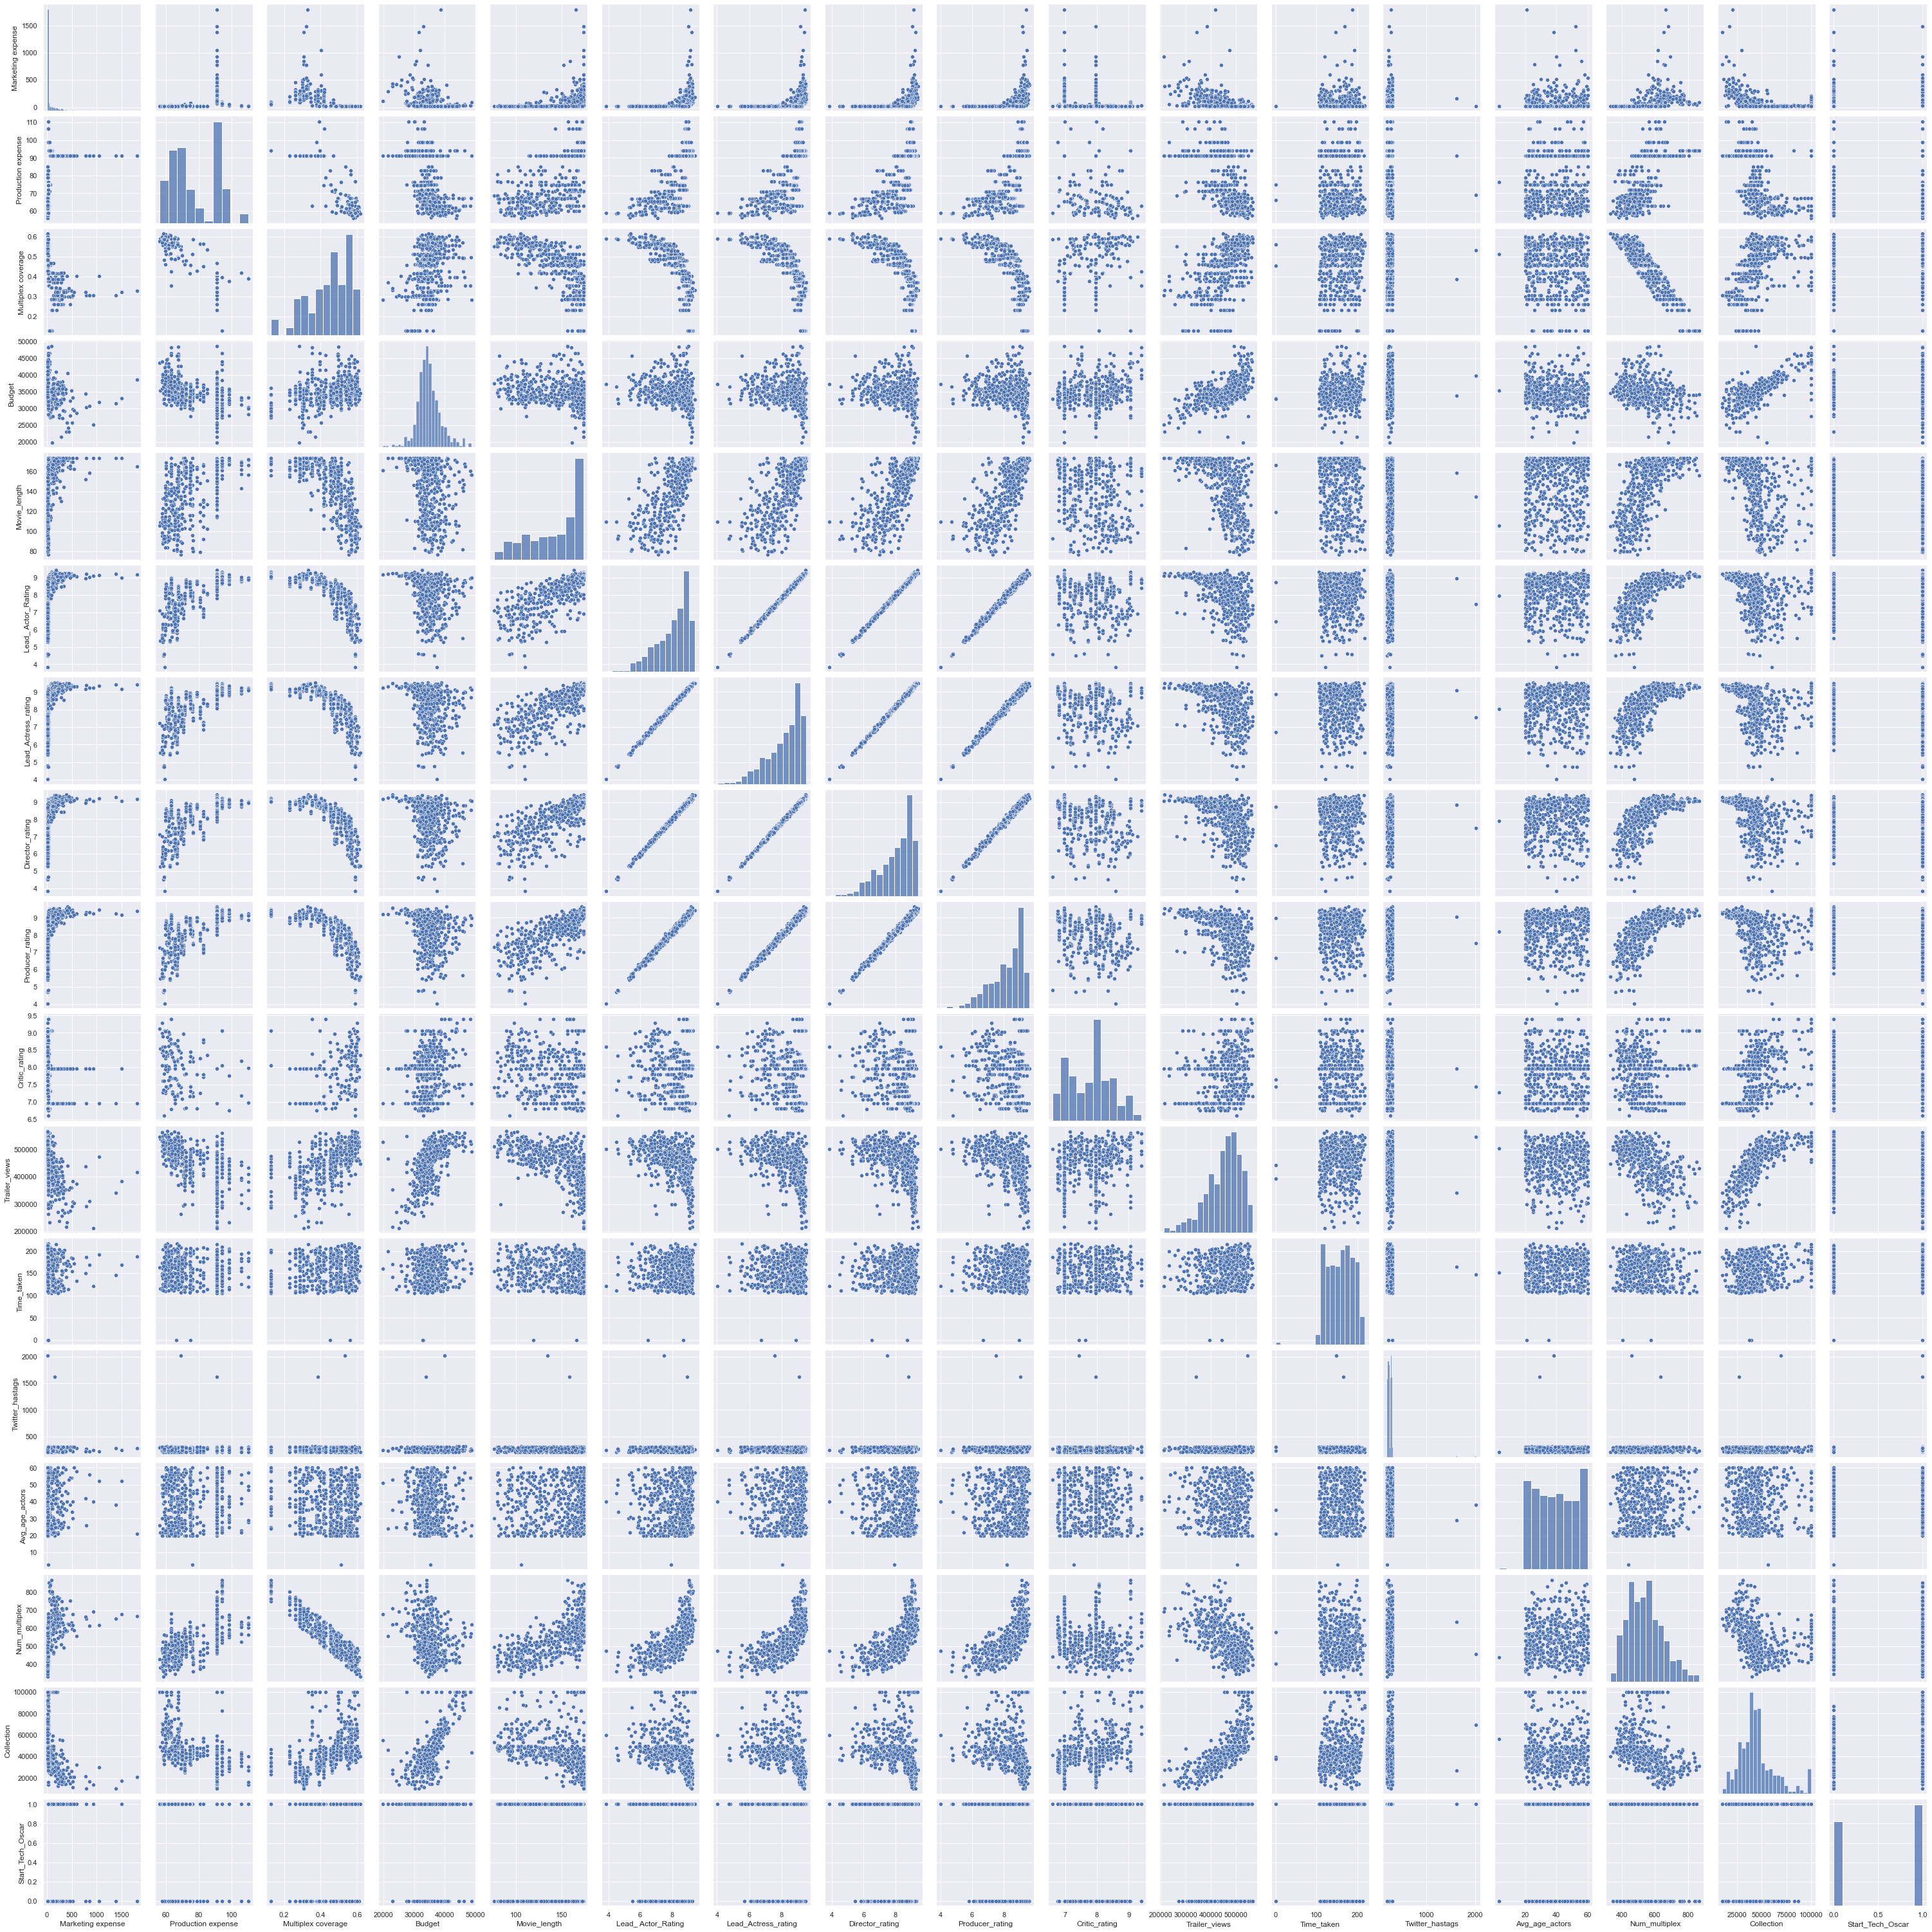

In [10]:
sns.pairplot(movie)